In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
stock_data = pd.read_csv(r'D:\ML_Projects\Stock-Market-Prediction\NIFTY 50_minute_data.csv')
stock_data.head()

,date,open,high,low,close,volume
0,2015-01-09 09:15:00,8285.45,8295.90,8285.45,8292.10,0
1,2015-01-09 09:16:00,8292.60,8293.60,8287.20,8288.15,0
2,2015-01-09 09:17:00,8287.40,8293.90,8287.40,8293.90,0
3,2015-01-09 09:18:00,8294.25,8300.65,8293.90,8300.65,0
4,2015-01-09 09:19:00,8300.60,8301.30,8298.75,8301.20,0


In [3]:
stock_data['open'].describe()

count    932946.000000
mean      13623.775737
std        5047.819576
min        6846.800000
25%        9428.450000
50%       11561.450000
75%       17607.137500
max       26273.400000
Name: open, dtype: float64

In [4]:
stock_data['open'] = stock_data['open'].apply(lambda x: round(x-6847))

In [5]:
stock_data['open'].nunique()

18808

In [6]:
stock_data['open'].unique()

array([ 1438,  1446,  1440, ..., 16005, 15999, 16023], dtype=int64)

In [7]:
stock_data['date'] = pd.to_datetime(stock_data['date'])
stock_data['date_only'] = stock_data['date'].dt.date
stock_data['date_only']

0         2015-01-09
1         2015-01-09
2         2015-01-09
3         2015-01-09
4         2015-01-09
             ...    
932941    2025-02-07
932942    2025-02-07
932943    2025-02-07
932944    2025-02-07
932945    2025-02-07
Name: date_only, Length: 932946, dtype: object

In [22]:
stock_data.groupby('date_only')['open'].count().unique()

array([375, 364, 355, 376, 370, 377, 371, 367, 374, 373,  72, 357,  60,
       336, 372, 361,  54, 368, 105, 369], dtype=int64)

In [8]:
data = stock_data.groupby('date_only')['open'].apply(list).reset_index()
data = data.drop(['date_only'], axis=1)

In [24]:
data.to_csv(r'D:\ML_Projects\Stock-Market-Prediction\stock_open_data.csv', index=False)

In [9]:
data = pd.read_csv(r'D:\ML_Projects\Stock-Market-Prediction\stock_open_data.csv')
data = data['open'].apply(lambda x:list(int(i) for i in x.strip('[]').split(', ')))
data = data.to_list()

In [26]:
vocab = set(j for i in data for j in i)
print(len(vocab))
print(min(vocab))
print(max(vocab))

18808
0
19426


In [6]:
stock_data = stock_data.drop(['volume'], axis=1)
stock_data

,date,open,high,low,close,date_only
0,2015-01-09 09:15:00,8285.45,8295.90,8285.45,8292.10,2015-01-09
1,2015-01-09 09:16:00,8292.60,8293.60,8287.20,8288.15,2015-01-09
2,2015-01-09 09:17:00,8287.40,8293.90,8287.40,8293.90,2015-01-09
3,2015-01-09 09:18:00,8294.25,8300.65,8293.90,8300.65,2015-01-09
4,2015-01-09 09:19:00,8300.60,8301.30,8298.75,8301.20,2015-01-09
...,...,...,...,...,...,...
932941,2025-02-07 15:25:00,23569.45,23570.60,23567.00,23568.10,2025-02-07
932942,2025-02-07 15:26:00,23568.10,23570.25,23565.30,23567.40,2025-02-07
932943,2025-02-07 15:27:00,23569.00,23578.35,23565.40,23576.50,2025-02-07
932944,2025-02-07 15:28:00,23577.05,23578.60,23567.45,23568.10,2025-02-07


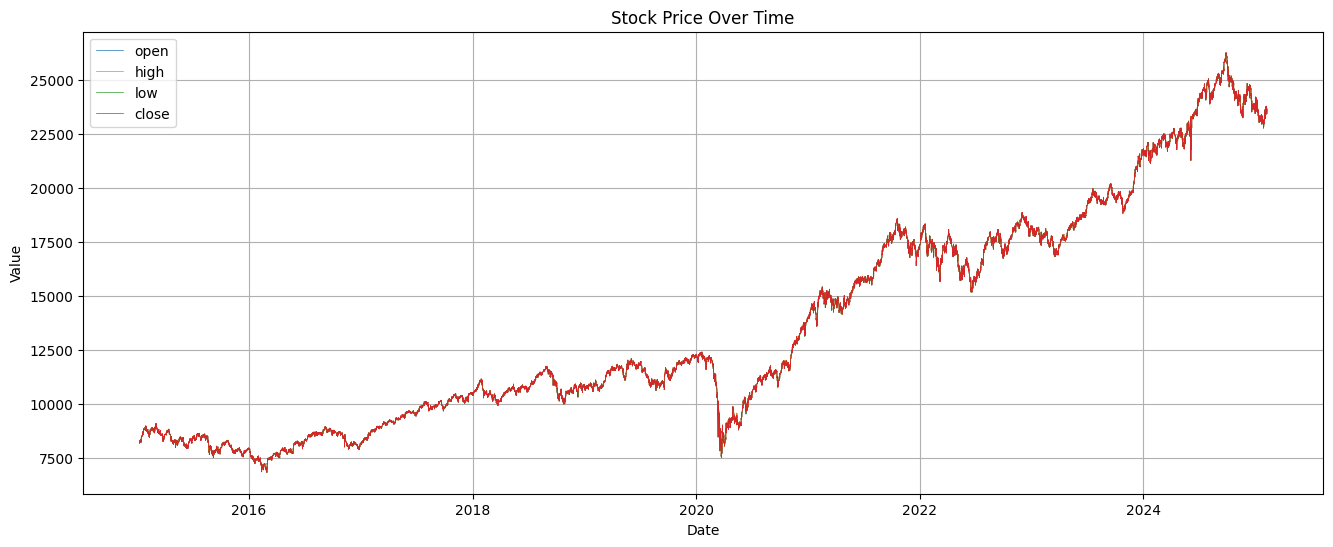

In [38]:
plt.figure(figsize=(16, 6))
plt.plot(stock_data['date_only'], stock_data['open'], label='open', lw=0.5)
plt.plot(stock_data['date_only'], stock_data['high'], label='high', lw=0.5)
plt.plot(stock_data['date_only'], stock_data['low'], label='low', lw=0.5)
plt.plot(stock_data['date_only'], stock_data['close'], label='close', lw=0.5)

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Stock Price Over Time')
plt.legend()
plt.grid(True)
plt.show()

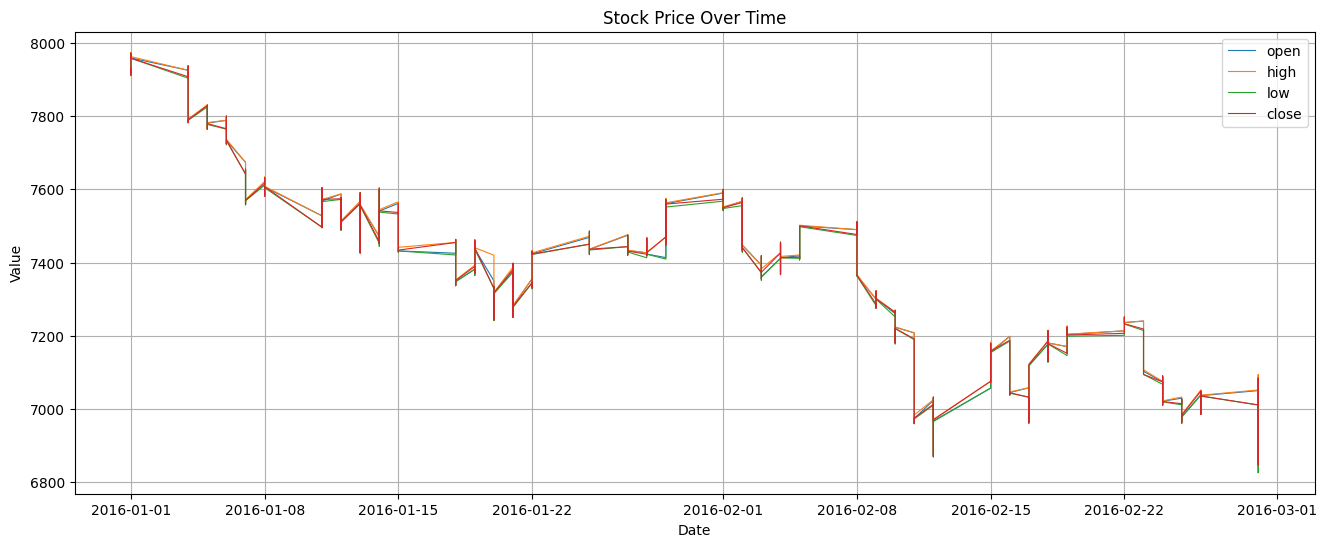

In [40]:
stock_data_2015 = stock_data[(stock_data['date'].dt.year == 2016) & ((stock_data['date'].dt.month == 1) | (stock_data['date'].dt.month == 2))]

plt.figure(figsize=(16, 6))
plt.plot(stock_data_2015['date_only'], stock_data_2015['open'], label='open', lw=0.8)
plt.plot(stock_data_2015['date_only'], stock_data_2015['high'], label='high', lw=0.8)
plt.plot(stock_data_2015['date_only'], stock_data_2015['low'], label='low', lw=0.8)
plt.plot(stock_data_2015['date_only'], stock_data_2015['close'], label='close', lw=0.8)

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Stock Price Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [32]:
in_data = data[2407]
y_actual = data[2408]
y_pred = [12811, 1953, 4965, 10269, 10232, 782, 10400, 5391, 11839, 857, 10796, 625, 4063, 0, 1962, 5077, 536, 11293, 10380, 4722, 1264, 7834, 15549, 7792, 3340, 16592, 7698, 0, 3500, 11078, 10425, 11500, 11684, 4393, 10836, 11095, 7682, 9699, 17424, 17861, 0, 2445, 4016, 10345, 10910, 3537, 8938, 16314, 4169, 1742, 12494, 1029, 4306, 2220, 8255, 14866, 11013, 12943, 7767, 1018, 3417, 18394, 5366, 17695, 5434, 3298, 4163, 4909, 16632, 5226, 3075, 3073, 3383, 15888, 11066, 5479, 16889, 11313, 0, 4698, 12928, 10873, 4281, 3932, 3353, 3546, 4819, 2478, 11343, 4034, 5423, 3636, 4707, 11104, 4611, 10290, 3984, 5180, 0, 3532, 4193, 4346, 1934, 3710, 15889, 2234, 12955, 12494, 6310, 10170, 6898, 15010, 4344, 3785, 1957, 1730, 11772, 2437, 2633, 1378, 3597, 5054, 11111, 12556, 0, 10454, 4581, 5205, 0, 8559, 0, 17889, 4571, 8692, 14949, 1696, 9015, 10018, 2589, 0, 1480, 15554, 10809, 4463, 16170, 4065, 1308, 0, 1132, 3424, 8803, 2714, 9332, 11280, 10624, 3924, 11322, 4994, 5378, 10219, 10789, 1121, 1899, 10216, 11111, 16748, 298, 4296, 13009, 4610, 0, 17431, 4035, 12896, 16355, 4063, 0, 12827, 4595, 4156, 0, 759, 9137, 11419, 787, 4317, 12947, 0, 4201, 4319, 3685, 4916, 10151, 14073, 4591, 16407, 11345, 5183, 3817, 4400, 1881, 15552, 3262, 3547, 632, 11730, 10620, 2088, 1794, 943, 5000, 1368, 17378, 1547, 18026, 5490, 1404, 8889, 10729, 3938, 3809, 0, 4583, 4591, 0, 10661, 4697, 1934, 10628, 12853, 18044, 15568, 1664, 1680, 12598, 17677, 5127, 4605, 9033, 4005, 10386, 15515, 4812, 1702, 4720, 16642, 1773, 5042, 11012, 1941, 3720, 10620, 4745, 12692, 4258, 6716, 17833, 12629, 1489, 4832, 10591, 12746, 11024, 9182, 0, 10170, 961, 7543, 1767, 3356, 1911, 1878, 17298, 3876, 4978, 820, 0, 3898, 0, 747, 12930, 7797, 4041, 4168, 4712, 10173, 3558, 3252, 16038, 4060, 11349, 3886, 0, 3383, 3698, 0, 16406, 3833, 5348, 0, 1684, 2512, 1653, 991, 9404, 10705, 9119, 4334, 17308, 1600, 10567, 1100, 4322, 18504, 1404, 3697, 3563, 5036, 4992, 4326, 11319, 5369, 5016, 11349, 4646, 1278, 5382, 1539, 9394, 1692, 3123, 11287, 4848, 2792, 669, 941, 1398, 4416, 3123, 3381, 11095, 2185, 1306, 3611, 3292, 6579, 3696, 11852, 0, 4029, 9027, 0, 4031, 4045, 0, 11053, 8724, 1428, 751, 9841, 8770, 3342, 3973, 4837, 5422, 17313, 9244, 10408, 8937, 3950, 10447, 11068, 2216, 5254, 15717]

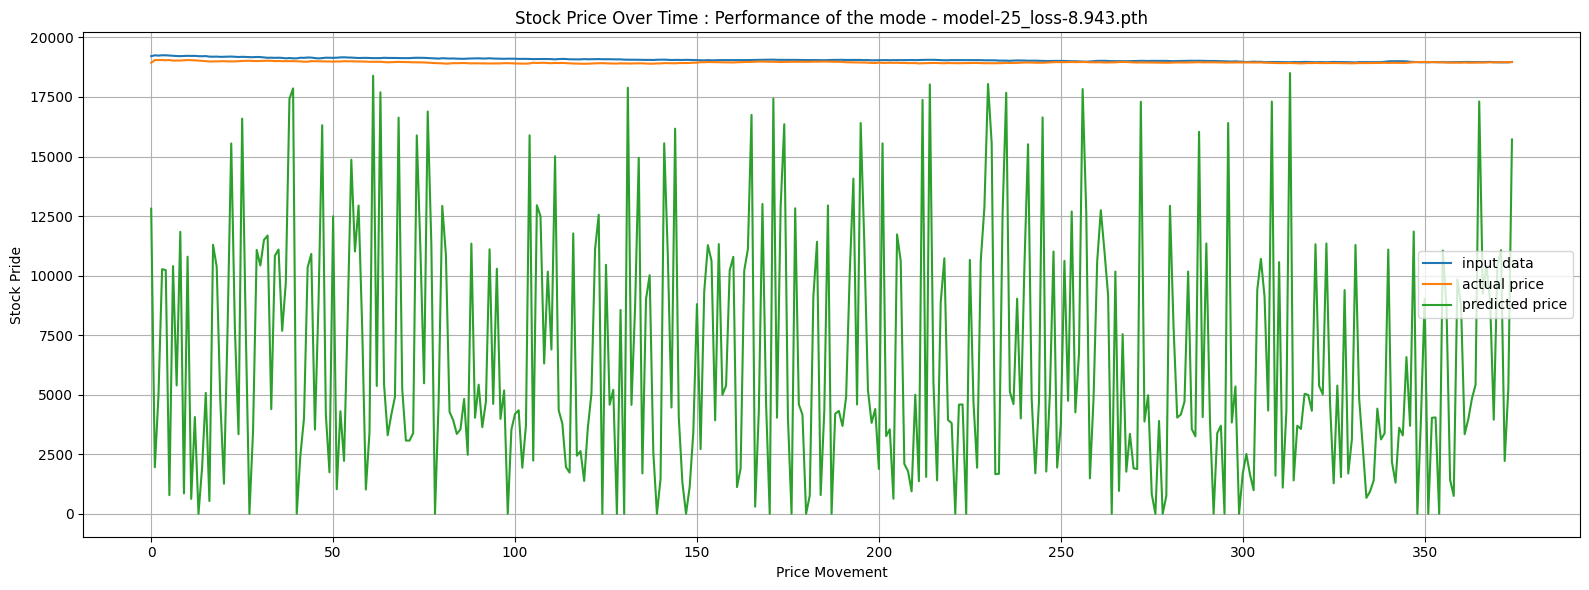

In [ ]:
# Compare predictions with the actual values by plotting a line chart
x = range(len(in_data))
plt.figure(figsize=(16, 6))
plt.plot(x, in_data, label='input data')
plt.plot(x, y_actual, label='actual price')
plt.plot(x, y_pred, label='predicted price')

plt.xlabel('Price Movement')
plt.ylabel('Stock Pride')
plt.title('Stock Price Over Time : Performance of the mode - model-25_loss-8.943.pth')
plt.legend(loc='center right') #, bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()